Classifying handwritten digits is a fundamental task in machine learning, and it can be approached using various techniques. In this example, we'll implement a linear classifier for handwritten digit recognition using TensorFlow. A linear classifier makes its classification decision by analyzing a linear combination of input features, often represented as a feature vector.

For this task, I will use TensorFlow 2.x and the Keras API, which is a more modern and widely used approach than the older tf.contrib.learn module. This example demonstrates how to create a linear classifier for handwritten digit classification:

In [2]:
pip install numpy

In [3]:
pip install matplotlib

In [4]:
pip install tensorflow

In [7]:
# Importing all dependence
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Suppress TensorFlow INFO and WARNING messages
tf.get_logger().setLevel('ERROR')

In [10]:
# Load the MNIST dataset using TensorFlow's datasets module
mnist = tf.keras.datasets.mnist

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images and normalize pixel value to range [0, 1]
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Convert labels to integers
labels = y_train.astype(np.int32)
test_labels = y_test.astype(np.int32)

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
max_examples = 10000
x_train = x_train[:max_examples]
labels = labels[:max_examples]

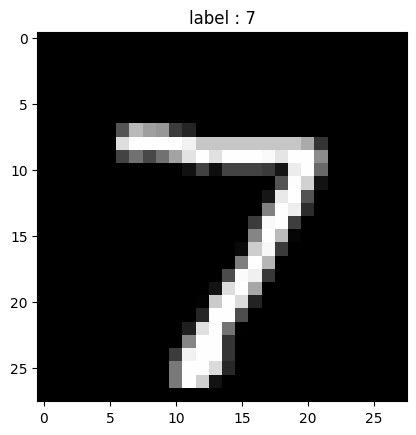

In [17]:
def display(i):
  img = x_test[i]
  plt.title('label : {}'.format(test_labels[i]))
  plt.imshow(img.reshape((28, 28)), cmap='gray')
  plt.show()

display(0)

In [21]:
# Define featue colums
feature_colums = [tf.feature_column.numeric_column(key="x", shape=(784,))]

# Create a linear classifier model using keras
classifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)), # Input layer with 784 features
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 classes
])

# Compile the model
classifier.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
classifier.fit(x_train, labels, batch_size=100, epochs=10) # Use 'epochs' instead of steps

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 1.2982 - accuracy: 0.6778
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.8517
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8770
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8926
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.9002
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.9062
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.9105
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.9146
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.9177
Epoch 10/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.9197

In [22]:
# Evalute the model on test data
test_loss, test_accuracy = classifier.evaluate(x_test, test_labels)

# Print the test accuracy
print("Test accuracy: ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.9091
Test accuracy:  0.9090999960899353


1/1 [==============================] - 0s 36ms/step
Prediction: 4
True Label: 4


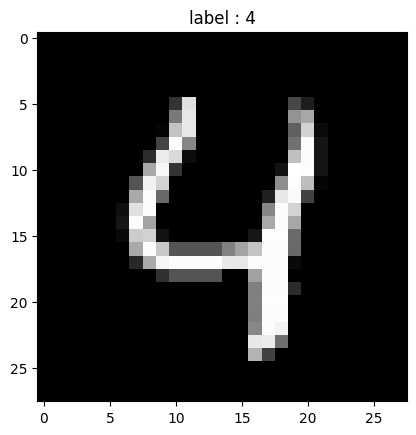

In [33]:
# Make predictions on a single test example
prediction = classifier.predict(np.array([x_test[4]]), batch_size=1)

# Print the prediction and the true label
print("Prediction:", np.argmax(prediction))
print("True Label:", test_labels[4])

# Display the predicted image using the 'display' function
display(4)